In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score
from model.linear_multiple import multipleLinearRegression

In [2]:
full_df=pd.read_csv("car details v4.csv")

<Axes: >

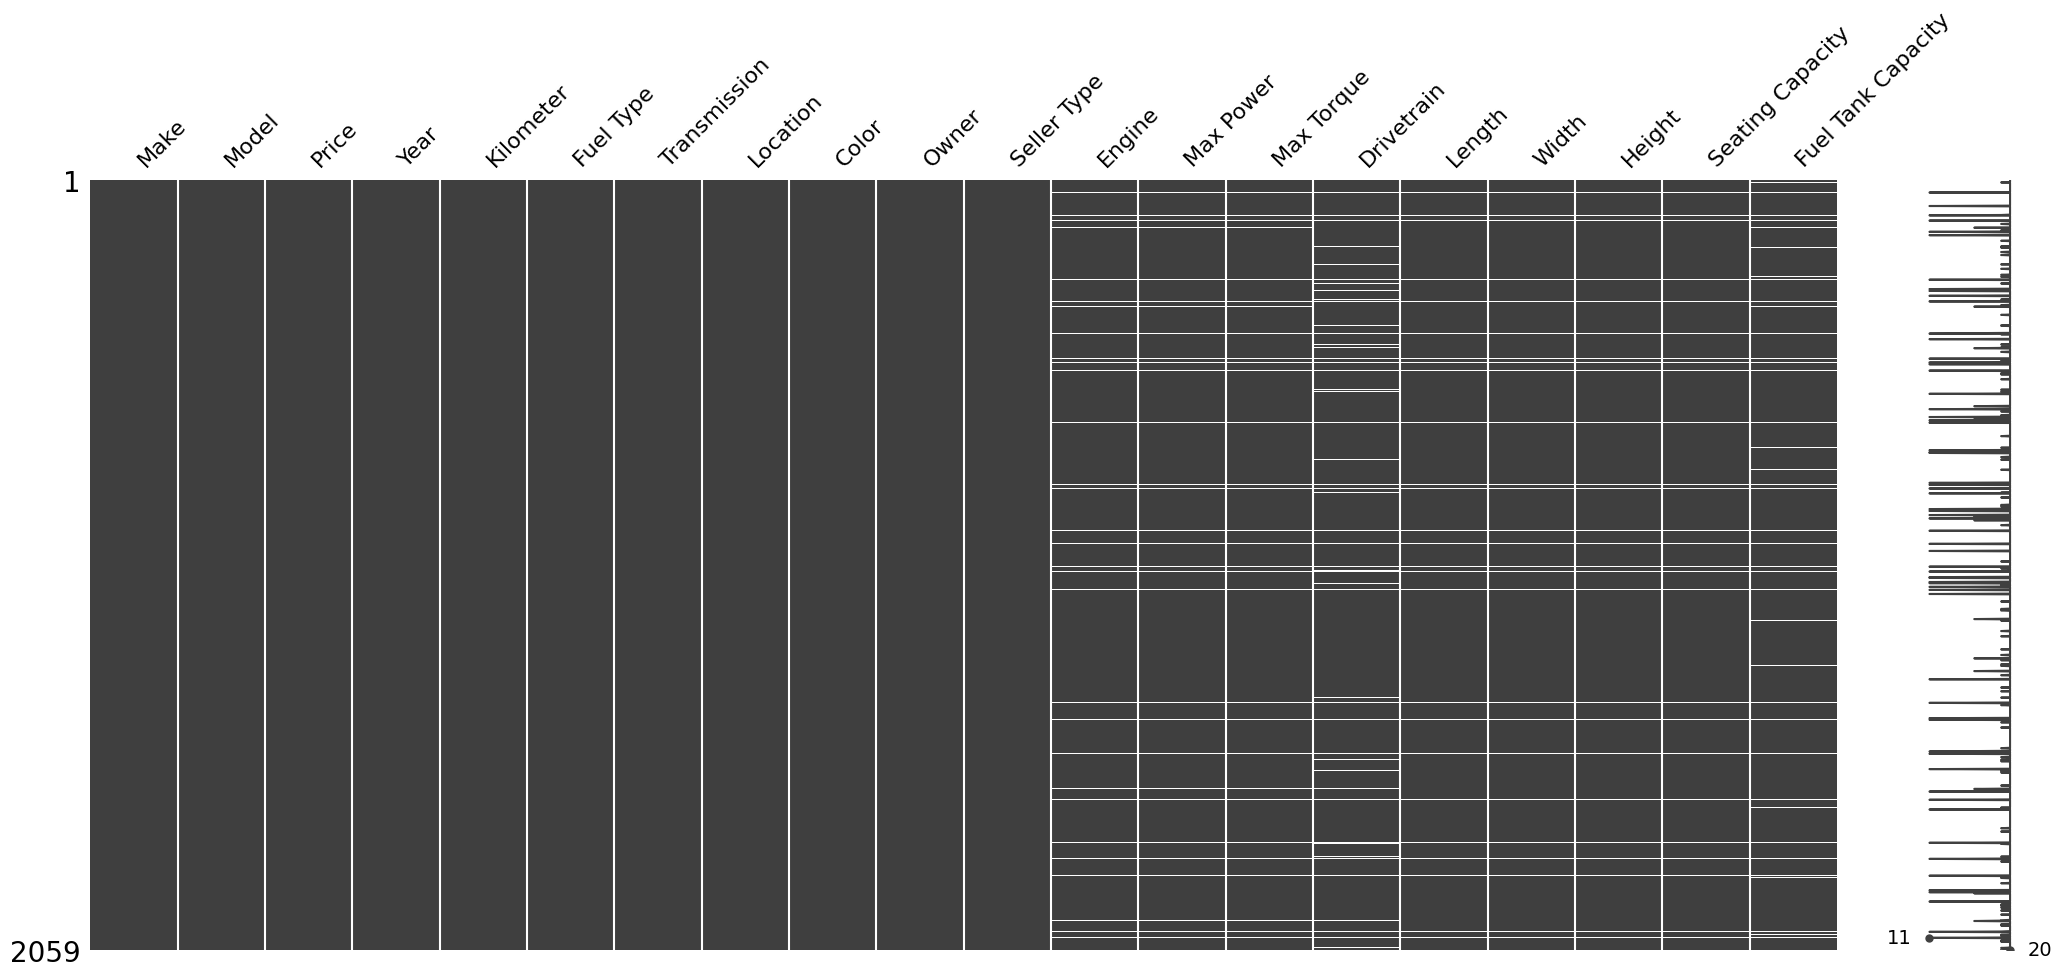

In [3]:
msno.matrix(full_df)

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 797 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1585 non-null   object 
 12  Max Power           1585 non-null   object 
 13  Max Torque          1585 non-null   object 
 14  Drivetrain          1541 non-null   object 
 15  Length              1597 non-null   float64
 16  Width    

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1853 to 1975
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Model               412 non-null    object 
 2   Price               412 non-null    int64  
 3   Year                412 non-null    int64  
 4   Kilometer           412 non-null    int64  
 5   Fuel Type           412 non-null    object 
 6   Transmission        412 non-null    object 
 7   Location            412 non-null    object 
 8   Color               412 non-null    object 
 9   Owner               412 non-null    object 
 10  Seller Type         412 non-null    object 
 11  Engine              394 non-null    object 
 12  Max Power           394 non-null    object 
 13  Max Torque          394 non-null    object 
 14  Drivetrain          382 non-null    object 
 15  Length              398 non-null    float64
 16  Width    

In [8]:
train_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
797,Land Rover,Discovery Sport HSE Luxury,3500000,2016,78000,Diesel,Automatic,Pune,Red,First,Individual,1999 cc,177 bhp @ 4000 rpm,430 Nm @ 1750 rpm,AWD,4600.0,2069.0,1690.0,7.0,65.0
1902,Renault,Kwid 1.0 RXL [2017-2019],365000,2019,32000,Petrol,Manual,Mumbai,Brown,First,Individual,999 cc,67 bhp @ 5500 rpm,91 Nm @ 4250 rpm,FWD,3679.0,1579.0,1478.0,5.0,28.0
595,Mercedes-Benz,E-Class E 200 Exclusive [2019-2019],6500000,2021,7500,Petrol,Automatic,Delhi,Black,First,Individual,1991 cc,194 bhp @ 5800 rpm,300 Nm @ 1600 rpm,RWD,5063.0,1860.0,1494.0,5.0,80.0
1398,BMW,5-Series 530d M Sport [2013-2017],4900000,2018,38000,Diesel,Automatic,Ahmedabad,Blue,First,Individual,2993 cc,258 bhp @ 4000 rpm,560 Nm @ 1500 rpm,RWD,4899.0,2094.0,1464.0,5.0,65.0
825,Maruti Suzuki,Swift LXi,440000,2016,53807,Petrol,Manual,Gurgaon,White,First,Individual,1197 cc,83 bhp @ 6000 rpm,115 Nm @ 4000 rpm,FWD,3850.0,1695.0,1530.0,5.0,42.0


In [9]:
test_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1853,Maruti Suzuki,Vitara Brezza VDi (O) [2016-2018],640000,2017,61000,Diesel,Manual,Kanpur,Maroon,First,Individual,1248 cc,89 bhp @ 4000 rpm,200 Nm @ 1750 rpm,FWD,3995.0,1790.0,1640.0,5.0,48.0
844,Hyundai,Elite i20 Magna 1.4 CRDI [2016-2017],650000,2016,61181,Diesel,Manual,Jaipur,White,First,Individual,1396 cc,89 bhp @ 4000 rpm,220 Nm @ 1500 rpm,FWD,3985.0,1734.0,1505.0,5.0,45.0
341,Porsche,Cayenne Platinum Edition Diesel,5350000,2016,55700,Diesel,Automatic,Navi Mumbai,Silver,First,Corporate,2967 cc,241 bhp @ 3800 rpm,550 Nm @ 1750 rpm,AWD,4855.0,1939.0,1705.0,5.0,85.0
1585,Honda,City 1.5 S MT,275000,2009,80000,Petrol,Manual,Mohali,Grey,First,Individual,1497 cc,118@6600,146@4600,FWD,4420.0,1695.0,1480.0,5.0,42.0
150,Kia,Seltos HTX Plus 1.5 Diesel [2020-2021],1575000,2019,55000,Diesel,Manual,Lucknow,Silver,First,Individual,1493 cc,113 bhp @ 4000 rpm,250 Nm @ 1500 rpm,FWD,4315.0,1800.0,1645.0,5.0,50.0


In [10]:
def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))
        else:
            return np.NaN
    return row['Engine']

train_df['Engine'] = train_df.apply(extract_engine_capacity, axis=1)


In [11]:
def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

train_df = train_df.groupby('Make').apply(extract_drivetrain)

In [12]:
train_df = train_df.dropna()
train_df['Engine'] = train_df['Engine'].str.replace('cc', '').astype(int)

<Axes: >

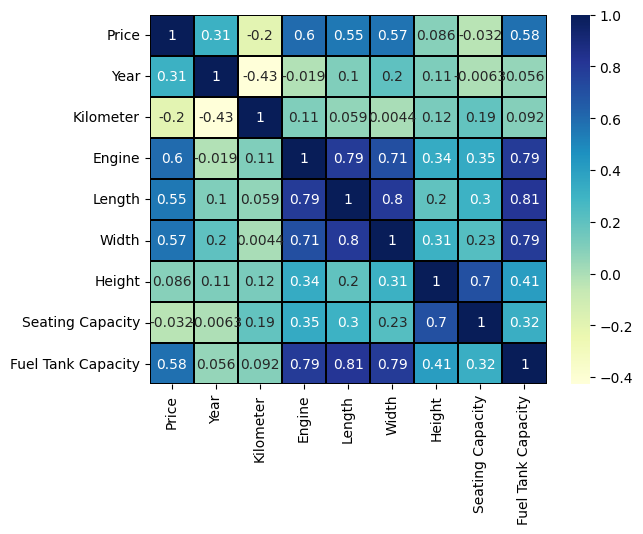

In [13]:
analysis_df = train_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Max Power', 'Max Torque'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [14]:
train_df[['bhp', 'rpm power']] = train_df['Max Power'].str.split('@', expand=True)
train_df['bhp'] = train_df['bhp'].str.replace(' bhp', '').str.strip()
train_df['rpm power'] = train_df['rpm power'].str.replace(' rpm', '').str.strip()

In [15]:
train_df[['Nm', 'rpm torque']] = train_df['Max Torque'].str.split('@', expand=True)
train_df['Nm'] = train_df['Nm'].str.replace(' Nm', '').str.strip()
train_df['rpm torque'] = train_df['rpm torque'].str.replace(' rpm', '').str.strip()

In [16]:
train_df['bhp'].replace('', np.nan, inplace=True)
train_df['rpm power'].replace('', np.nan, inplace=True)
train_df['Nm'].replace('', np.nan, inplace=True)
train_df['rpm torque'].replace('', np.nan, inplace=True)

In [17]:
train_df = train_df.drop(['Max Power', 'Max Torque'], axis=1)
train_df.head()

Make                             Model    Price  Year  Kilometer  \
Make                                                                          
Audi 1620  Audi  A4 2.0 TDI (177bhp) Premium Plus  1175000  2013      50000   
     104   Audi                A6 2.0 TDI Premium  1325000  2012      98580   
     1459  Audi         Q7 45 TDI Technology Pack  3750000  2016      88000   
     139   Audi           Q5 45 TFSI Premium Plus  5651000  2022          1   
     600   Audi              A4 35 TDI Technology  2400000  2017      59267   

          Fuel Type Transmission Location   Color             Owner  ...  \
Make                                                                 ...   
Audi 1620    Diesel    Automatic     Pune   White             First  ...   
     104     Diesel    Automatic      Goa   White             First  ...   
     1459    Diesel    Automatic    Delhi   White            Second  ...   
     139     Petrol    Automatic    Delhi    Blue  UnRegistered Car  ...   
     600     Diesel    Automatic  Kolkata  Silver             First  ...   

          Drivetrain  Length   Width  Height  Seating Capacity  \
Make                                                             
Audi 1620        FWD  4701.0  1826.0  1427.0               5.0   
     104         FWD  4915.0  1874.0  1455.0               5.0   
     1459        AWD  5052.0  1968.0  1740.0               7.0   
     139         AWD  4663.0  1898.0  1659.0               5.0   
     600         FWD  4726.0  1842.0  1427.0               5.0   

           Fuel Tank Capacity  bhp  rpm power   Nm rpm torque  
Make                                                           
Audi 1620                63.0  177       4200  380       1750  
     104                 65.0  177       3750  380       1750  
     1459                75.0  245       2910  600       1500  
     139                 70.0  248       5000  370       1600  
     600                 54.0  188       4200  400       1750  

[5 rows x 22 columns]

In [18]:
train_df = train_df.dropna()

<Axes: >

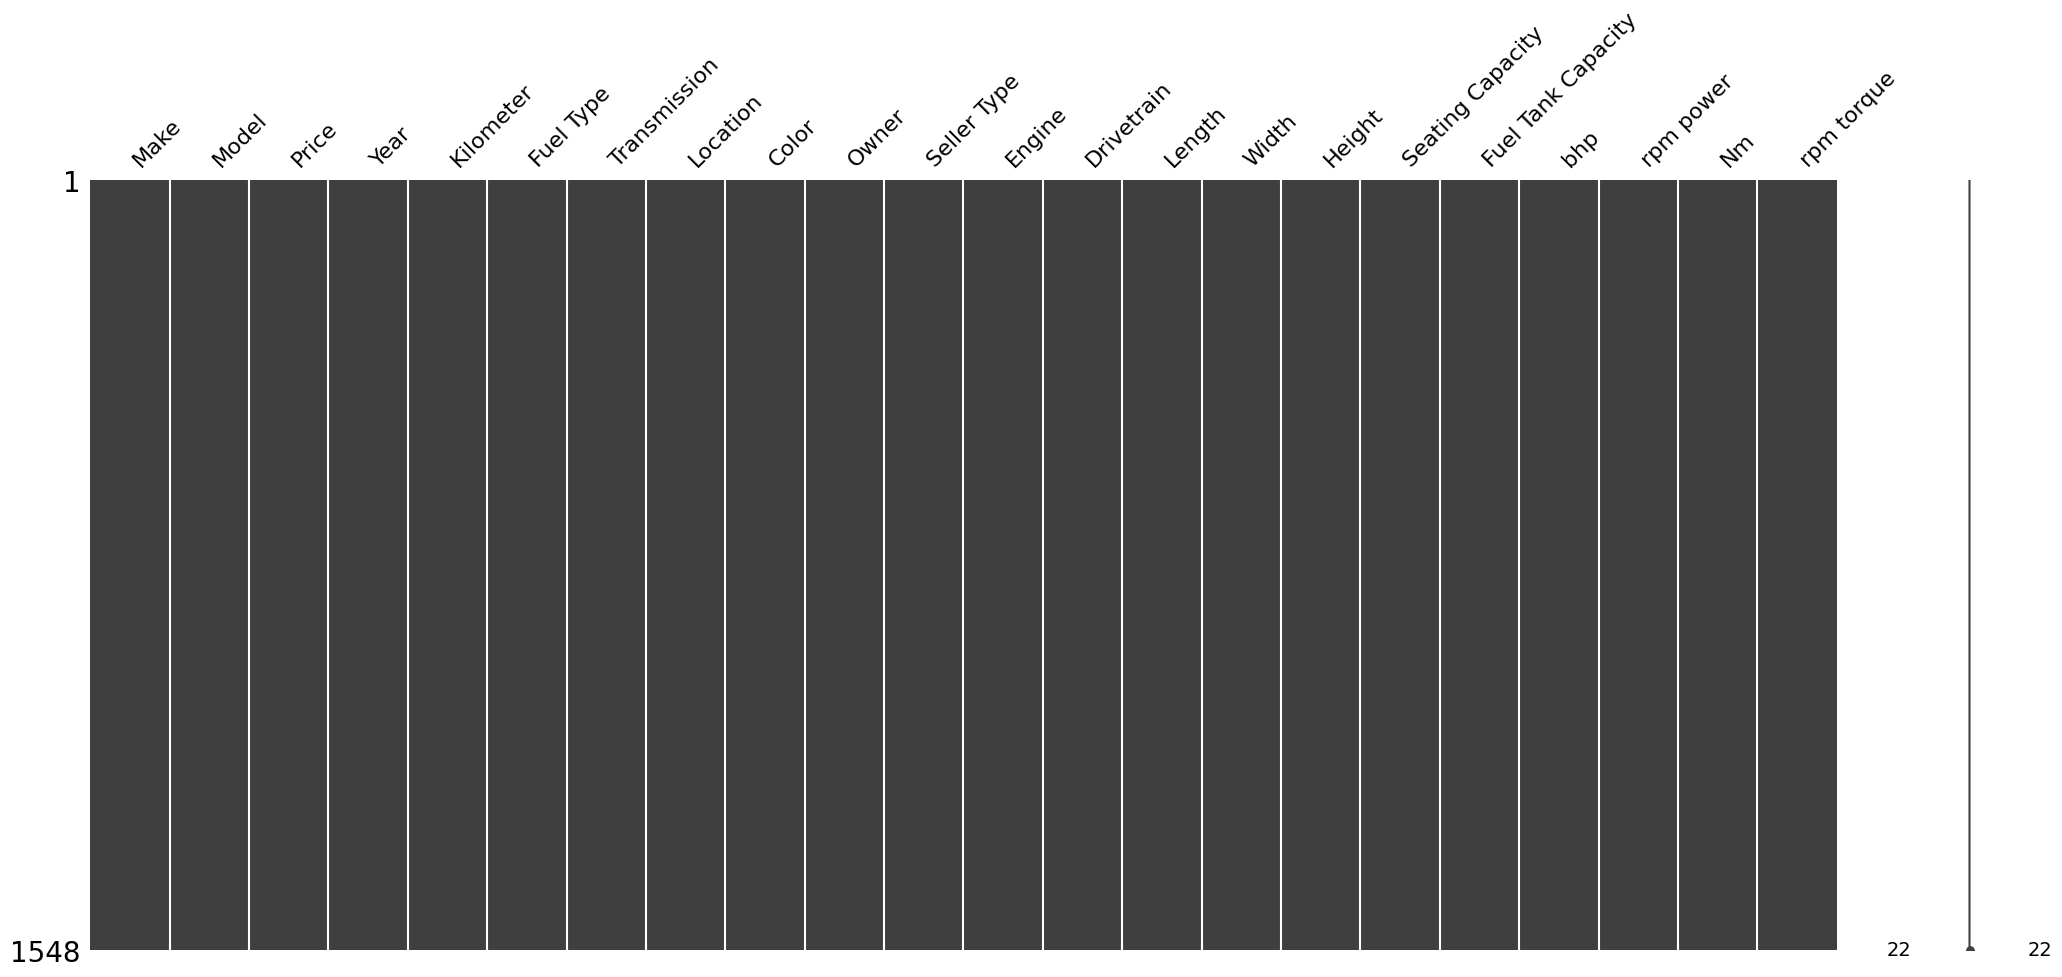

In [19]:
msno.matrix(train_df)

In [20]:
train_df.head()

Make                             Model    Price  Year  Kilometer  \
Make                                                                          
Audi 1620  Audi  A4 2.0 TDI (177bhp) Premium Plus  1175000  2013      50000   
     104   Audi                A6 2.0 TDI Premium  1325000  2012      98580   
     1459  Audi         Q7 45 TDI Technology Pack  3750000  2016      88000   
     139   Audi           Q5 45 TFSI Premium Plus  5651000  2022          1   
     600   Audi              A4 35 TDI Technology  2400000  2017      59267   

          Fuel Type Transmission Location   Color             Owner  ...  \
Make                                                                 ...   
Audi 1620    Diesel    Automatic     Pune   White             First  ...   
     104     Diesel    Automatic      Goa   White             First  ...   
     1459    Diesel    Automatic    Delhi   White            Second  ...   
     139     Petrol    Automatic    Delhi    Blue  UnRegistered Car  ...   
     600     Diesel    Automatic  Kolkata  Silver             First  ...   

          Drivetrain  Length   Width  Height  Seating Capacity  \
Make                                                             
Audi 1620        FWD  4701.0  1826.0  1427.0               5.0   
     104         FWD  4915.0  1874.0  1455.0               5.0   
     1459        AWD  5052.0  1968.0  1740.0               7.0   
     139         AWD  4663.0  1898.0  1659.0               5.0   
     600         FWD  4726.0  1842.0  1427.0               5.0   

           Fuel Tank Capacity  bhp  rpm power   Nm rpm torque  
Make                                                           
Audi 1620                63.0  177       4200  380       1750  
     104                 65.0  177       3750  380       1750  
     1459                75.0  245       2910  600       1500  
     139                 70.0  248       5000  370       1600  
     600                 54.0  188       4200  400       1750  

[5 rows x 22 columns]

In [21]:
year_mapping = {year: index for index, year in enumerate(sorted(train_df['Year'].unique()))}
train_df['Year'] = train_df['Year'].map(year_mapping)

In [22]:
train_df = train_df.dropna()

In [23]:
columns_to_normalize = ['Price', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'bhp', 'rpm power', 'Nm', 'rpm torque']

scaler = preprocessing.StandardScaler()

train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

<Axes: >

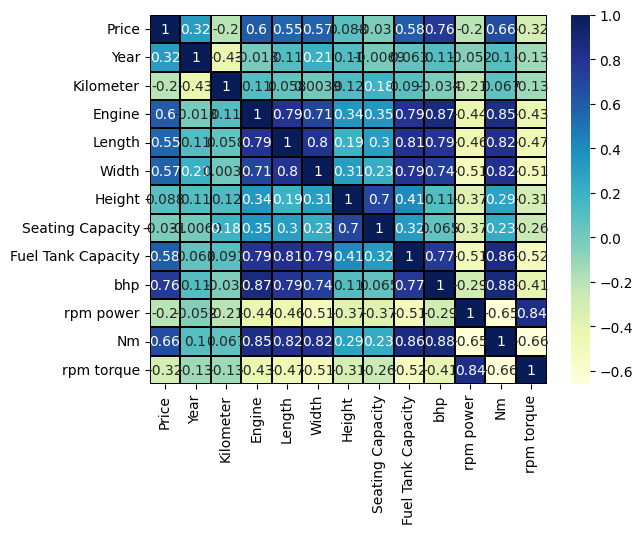

In [24]:
analysis_df = train_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [25]:
train_df.head()

Make                             Model     Price  Year  Kilometer  \
Make                                                                           
Audi 1620  Audi  A4 2.0 TDI (177bhp) Premium Plus -0.208706     8  -0.077567   
     104   Audi                A6 2.0 TDI Premium -0.147413     7   1.138862   
     1459  Audi         Q7 45 TDI Technology Pack  0.843492    11   0.873942   
     139   Audi           Q5 45 TFSI Premium Plus  1.620280    17  -1.329527   
     600   Audi              A4 35 TDI Technology  0.291854    12   0.154476   

          Fuel Type Transmission Location   Color             Owner  ...  \
Make                                                                 ...   
Audi 1620    Diesel    Automatic     Pune   White             First  ...   
     104     Diesel    Automatic      Goa   White             First  ...   
     1459    Diesel    Automatic    Delhi   White            Second  ...   
     139     Petrol    Automatic    Delhi    Blue  UnRegistered Car  ...   
     600     Diesel    Automatic  Kolkata  Silver             First  ...   

          Drivetrain    Length     Width    Height  Seating Capacity  \
Make                                                                   
Audi 1620        FWD  0.962704  0.452594 -1.213145         -0.383889   
     104         FWD  1.451061  0.813574 -1.004151         -0.383889   
     1459        AWD  1.763700  1.520492  1.123113          2.123537   
     139         AWD  0.875987  0.994064  0.518522         -0.383889   
     600         FWD  1.019755  0.572921 -1.213145         -0.383889   

           Fuel Tank Capacity       bhp  rpm power        Nm  rpm torque  
Make                                                                      
Audi 1620            0.722462  0.762094  -0.588236  1.005017   -0.739058  
     104             0.854672  0.762094  -0.996879  1.005017   -0.739058  
     1459            1.515718  1.828151  -1.759680  2.608180   -0.945284  
     139             1.185195  1.875183   0.138241  0.932146   -0.862794  
     600             0.127520  0.934545  -0.588236  1.150759   -0.739058  

[5 rows x 22 columns]

In [26]:
def one_hot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
train_df = one_hot_encode(train_df, columns=['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'])

In [27]:
train_df.head()

Model     Price  Year  Kilometer  \
Make                                                                     
Audi 1620  A4 2.0 TDI (177bhp) Premium Plus -0.208706     8  -0.077567   
     104                 A6 2.0 TDI Premium -0.147413     7   1.138862   
     1459         Q7 45 TDI Technology Pack  0.843492    11   0.873942   
     139            Q5 45 TFSI Premium Plus  1.620280    17  -1.329527   
     600               A4 35 TDI Technology  0.291854    12   0.154476   

             Engine    Length     Width    Height  Seating Capacity  \
Make                                                                  
Audi 1620  0.449075  0.962704  0.452594 -1.213145         -0.383889   
     104   0.449075  1.451061  0.813574 -1.004151         -0.383889   
     1459  2.008279  1.763700  1.520492  1.123113          2.123537   
     139   0.474047  0.875987  0.994064  0.518522         -0.383889   
     600   0.449075  1.019755  0.572921 -1.213145         -0.383889   

           Fuel Tank Capacity  ...  Owner_Fourth  Owner_Second  Owner_Third  \
Make                           ...                                            
Audi 1620            0.722462  ...         False         False        False   
     104             0.854672  ...         False         False        False   
     1459            1.515718  ...         False          True        False   
     139             1.185195  ...         False         False        False   
     600             0.127520  ...         False         False        False   

           Owner_UnRegistered Car  Seller Type_Commercial Registration  \
Make                                                                     
Audi 1620                   False                                False   
     104                    False                                False   
     1459                   False                                False   
     139                     True                                False   
     600                    False                                False   

           Seller Type_Corporate  Seller Type_Individual  Drivetrain_AWD  \
Make                                                                       
Audi 1620                  False                    True           False   
     104                   False                    True           False   
     1459                  False                    True            True   
     139                   False                    True            True   
     600                   False                    True           False   

           Drivetrain_FWD  Drivetrain_RWD  
Make                                       
Audi 1620            True           False  
     104             True           False  
     1459           False           False  
     139            False           False  
     600             True           False  

[5 rows x 159 columns]

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1548 entries, ('Audi', 1620) to ('Volvo', 744)
Columns: 159 entries, Model to Drivetrain_RWD
dtypes: bool(145), float64(12), int64(1), object(1)
memory usage: 471.8+ KB


In [29]:
y = train_df[['Price']].values
X = train_df[['Engine']].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.36


In [31]:
y_adv = y
X_adv = train_df[['Year','Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.53


In [33]:
model.score(X_test, y_test)

0.5254844790116096

In [34]:
y_fin = y
X_fin = train_df[['Year','Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity']].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_fin, y_fin, test_size=0.4, random_state=69)


In [36]:
mlr = multipleLinearRegression()
W, train_loss, num_epochs = mlr.train(X_train, y_train)
test_pred, test_loss = mlr.test(X_test, y_test, W)

In [37]:
r2 = mlr.score(y_test, y_pred)
print("Custom model R^2 Score: ", r2)

Custom model R^2 Score:  0.5254844790116096


In [38]:
year = st.sidebar.number_input('Year', min_value=2011, max_value=2022, value=2017)
kilometer = st.sidebar.number_input('Kilometer', min_value=0, max_value=1000000, value=80000)
engine = st.sidebar.number_input('Engine', min_value=0, max_value=10000, value=1200)
length = st.sidebar.number_input('Length', min_value=0, max_value=10000, value=3992)
width = st.sidebar.number_input('Width', min_value=0, max_value=10000, value=1687)
height = st.sidebar.number_input('Height', min_value=0, max_value=10000, value=1525)
seating_capacity = st.sidebar.number_input('Seating Capacity', min_value=0, max_value=6, value=5)
fuel_tank_capacity = st.sidebar.number_input('Fuel Tank Capacity', min_value=0, max_value=10000, value=39)

2024-01-24 11:26:34.882 
  command:

    streamlit run C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [39]:
if st.button('Predict Price'):

    year = year.map(year_mapping)
    kilometer = scaler.fit_transform(kilometer)
    engine = scaler.fit_transform(engine)
    length = scaler.fit_transform(length)
    width = scaler.fit_transform(width)
    height = scaler.fit_transform(height)
    seating_capacity = scaler.fit_transform(seating_capacity)
    fuel_tank_capacity = scaler.fit_transform(fuel_tank_capacity)
    

    data = pd.DataFrame([[year, kilometer, engine, length, width, height, seating_capacity, fuel_tank_capacity]], columns=['Year','Kilometer','Engine','Length','Width','Height','Seating Capacity','Fuel Tank Capacity'])
    input_data_as_numpy_array = np.asarray(data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    price = mlr.predict(X_new)
    
    st.write('The predicted price of the car is $%.2f' % price)